In [1]:
import pandas as pd

In [133]:
data=pd.read_csv("dataset.csv",delimiter=";")

In [131]:
#data=data[["estado","e2","e3","e5","e0"]]

In [134]:
data=data[["estado","e2","e5"]]

In [135]:
data

,estado,e2,e5
0,R,0,0
1,R,0,0
2,R,0,0
3,R,0,0
4,R,0,0
...,...,...,...
462,A,0,0
463,A,0,0
464,A,0,0
465,A,0,0


<Axes: xlabel='estado'>

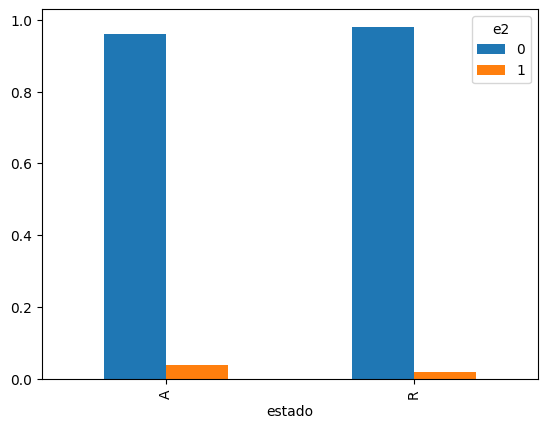

In [136]:
pd.crosstab(data["estado"],data["e2"],normalize="index").plot.bar()

<Axes: xlabel='estado'>

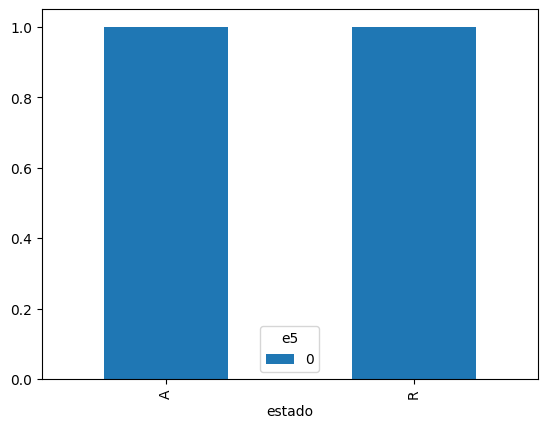

In [138]:
pd.crosstab(data["estado"],data["e5"],normalize="index").plot.bar()

In [139]:
from sklearn.model_selection import train_test_split
import numpy as np

In [140]:
Y=data["estado"].astype("category").cat.codes

In [141]:
Y.value_counts()

0    418
1     49
Name: count, dtype: int64

In [143]:
X=data[["e2","e5"]]

In [144]:
X

,e2,e5
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
462,0,0
463,0,0
464,0,0
465,0,0


In [145]:
X=X.to_numpy()
Y=Y.to_numpy()

In [146]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=1)

In [147]:
from imblearn.over_sampling import RandomOverSampler

In [148]:
np.sum(y_train)

39

In [149]:
y_train.shape

(373,)

In [150]:
os=RandomOverSampler(random_state=1)
x_train_o,y_train_o=os.fit_resample(x_train,y_train)

In [151]:
x_train_o.shape

(668, 2)

In [152]:
y_train_o.shape

(668,)

In [153]:
np.sum(y_train_o)

334

In [154]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Input
from keras.models import Sequential

In [155]:
modelo=Sequential()
modelo.add(Input(shape=(2,)))
modelo.add(Dense(32))
modelo.add(Dense(1,activation="sigmoid"))
modelo.compile(loss="binary_crossentropy",metrics=["accuracy"])

In [156]:
modelo.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129 (516.00 B)

 Trainable params: 129 (516.00 B)

 Non-trainable params: 0 (0.00 B)

In [157]:
modelo.fit(x_train_o,y_train_o,validation_data=(x_test,y_test),epochs=16)

Epoch 1/16
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5035 - loss: 0.6927 - val_accuracy: 0.8936 - val_loss: 0.6862
Epoch 2/16
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5176 - loss: 0.6916 - val_accuracy: 0.8936 - val_loss: 0.6842
Epoch 3/16
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5369 - loss: 0.6934 - val_accuracy: 0.1383 - val_loss: 0.6876
Epoch 4/16
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5315 - loss: 0.6925 - val_accuracy: 0.8936 - val_loss: 0.6855
Epoch 5/16
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5128 - loss: 0.6961 - val_accuracy: 0.1383 - val_loss: 0.6860
Epoch 6/16
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5132 - loss: 0.6946 - val_accuracy: 0.1383 - val_loss: 0.6865
Epoch 7/16
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5131 - loss: 0.6948 - val_accuracy: 0.1383 - val_loss: 0.6894
Epoch 8/16
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5274 - loss: 0.6911 - val_accuracy: 0.1383 - val_loss: